In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

In [2]:
house_df = pd.read_csv("kc_house_data.csv")

In [3]:
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
house_df['date'] = pd.to_datetime(house_df['date'], format = '%Y-%m-%d')

In [5]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null datetime64[ns]
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(15)
memory usage: 3.5 MB


In [6]:
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
house_df['month'] = house_df['date'].dt.month
house_df['year'] = house_df['date'].dt.year
house_df['age'] = 2015 - house_df['yr_built']

In [8]:
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year,age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,10,2014,60
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014,64
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,2,2015,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,12,2014,50
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,2,2015,28


### Housing data is one calendar year from May 2014, to May 2015

In [9]:
house_df.groupby(['year'])['month'].unique()

year
2014    [10, 12, 5, 6, 7, 8, 11, 9]
2015                [2, 1, 4, 3, 5]
Name: month, dtype: object

### How many homes were sold per month in the calendar year?

In [10]:
monthly_sales_count = house_df.groupby(['month'])['price'].count()
monthly_sales_count

month
1      978
2     1250
3     1875
4     2231
5     2414
6     2180
7     2211
8     1940
9     1774
10    1878
11    1411
12    1471
Name: price, dtype: int64

### Plot Homes sold per month

In [11]:
month_x = np.sort(house_df.month.unique())
month_x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

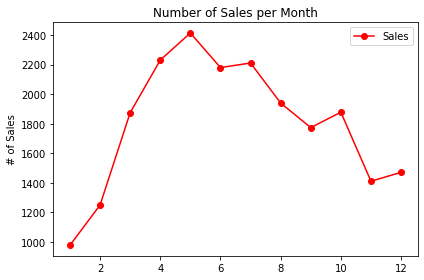

In [12]:
plt.plot(month_x, monthly_sales_count, color="red", label='Sales',marker='o')
plt.legend()

plt.ylabel("# of Sales")
plt.legend(loc="best")
plt.title("Number of Sales per Month")
plt.tight_layout()

### Plot Avg Price of Homes sold per month

In [13]:
monthly_sales_mean = house_df.groupby(['month'])['price'].mean()
round(monthly_sales_mean,2)

month
1     525963.25
2     507919.60
3     544057.68
4     561933.46
5     550849.75
6     558123.74
7     544892.16
8     536527.04
9     529315.87
10    539127.48
11    522058.86
12    524602.89
Name: price, dtype: float64

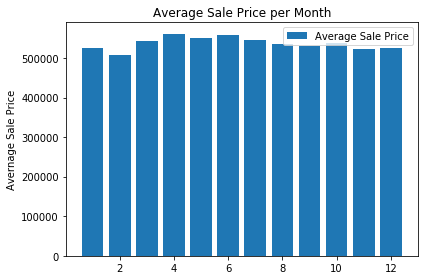

In [14]:
plt.bar(month_x, monthly_sales_mean, label='Average Sale Price')
plt.legend()

plt.ylabel("Avernage Sale Price")
plt.legend(loc="best")
plt.title("Average Sale Price per Month")
plt.tight_layout()

### Plot Age of Home vs Selling price

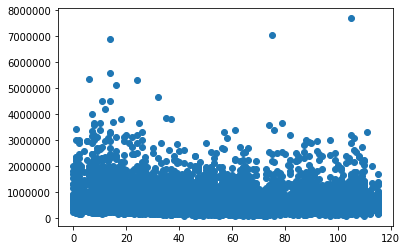

In [16]:
age_x = house_df['age']
sell_price_y = house_df['price']

plt.scatter(age_x, sell_price_y)

In [15]:
min_price = round(house_df['price'].min(),2)
max_price = round(house_df['price'].max(),2)
median_price= round(house_df['price'].median(),2)
mean_price = round(house_df['price'].mean(),2)

print('The minimum price for a home sold was ' + str(min_price))
print('The maximum price for a home sold was ' + str(max_price))
print('The median price for a home sold was ' + str(median_price))
print('The average price for a home sold was ' + str(mean_price))

The minimum price for a home sold was 75000.0
The maximum price for a home sold was 7700000.0
The median price for a home sold was 450000.0
The average price for a home sold was 540182.16
